In [21]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [22]:
metadata = pd.read_csv("HAM10000_metadata.csv")

metadata

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [23]:
# Step 2: Load Metadata
metadata = pd.read_csv("HAM10000_metadata.csv")
label_map = {'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}
metadata['label'] = metadata['dx'].map(label_map)
metadata

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,0


In [ ]:
# Step 3: Load and Resize Images
image_dir = "HAM10000_all_images"  # Adjust if using part_2 or combined folder
IMG_SIZE = 64

images = []
labels = []

for i, row in metadata.iterrows():
    img_path = os.path.join(image_dir, row['image_id'] + '.jpg')
    if os.path.exists(img_path):
        img = Image.open(img_path).resize((IMG_SIZE, IMG_SIZE))
        images.append(np.array(img) / 255.0)
        labels.append(row['label'])

X = np.array(images)
y = to_categorical(labels, num_classes=7)

print("Image shape:", X.shape)
print("Label shape:", y.shape)

In [ ]:
import os
import pandas as pd
from PIL import Image
import numpy as np

# Load metadata
metadata = pd.read_csv("HAM10000_metadata.csv")
label_map = {'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}
metadata['label'] = metadata['dx'].map(label_map)

# ✅ Adjust this if needed
image_dir = "HAM10000_all_images"  # or "HAM10000_images_part_1" if you only have part 1

# Load images
images = []
labels = []
missing = 0

for i, row in metadata.iterrows():
    img_file = row['image_id'] + ".jpg"
    img_path = os.path.join(image_dir, img_file)
    if os.path.exists(img_path):
        try:
            img = Image.open(img_path).resize((64, 64))
            images.append(np.array(img) / 255.0)
            labels.append(label_map[row['dx']])
        except:
            missing += 1
    else:
        missing += 1

print("✅ Loaded images:", len(images))
print("❌ Missing or failed images:", missing)


In [ ]:
# Step 4: Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Step 5: Define the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')  # 7 classes
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,055 (6.20 MB)

 Trainable params: 1,626,055 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Step 6: Train the Model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=10,
                    batch_size=32)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6503 - loss: 1.1260 - val_accuracy: 0.6630 - val_loss: 0.9602
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6993 - loss: 0.8764 - val_accuracy: 0.6860 - val_loss: 0.9243
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7106 - loss: 0.8237 - val_accuracy: 0.6790 - val_loss: 0.8962
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7241 - loss: 0.7576 - val_accuracy: 0.6840 - val_loss: 0.8626
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7391 - loss: 0.7181 - val_accuracy: 0.6990 - val_loss: 0.8624
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7499 - loss: 0.6909 - val_accuracy: 0.6900 - val_loss: 0.8318
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7736 - loss: 0.6072 - val_accuracy: 0.7250 - val_loss: 0.7656
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7853 - loss: 0.5704 - val_accu

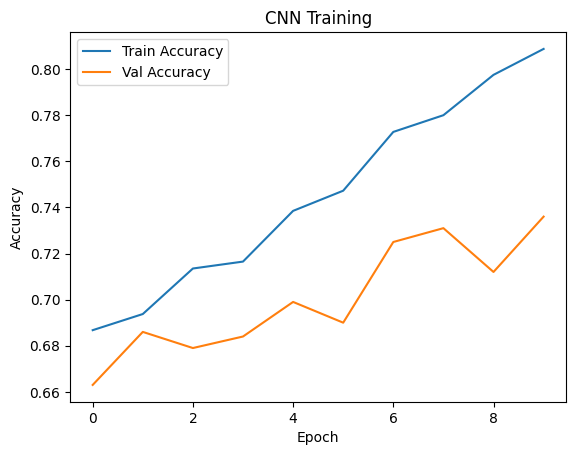

In [33]:
# Step 7: Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('CNN Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [34]:
from tensorflow.keras.models import load_model

model = load_model("ham10000_cnn_model.h5")

# Load your iPhone image
your_img = Image.open("your_image.jpg").resize((64, 64))
your_img_array = np.expand_dims(np.array(your_img) / 255.0, axis=0)

prediction = model.predict(your_img_array)
classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
print("Predicted Lesion Type:", classes[np.argmax(prediction)])

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'ham10000_cnn_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Load metadata
metadata = pd.read_csv("HAM10000_metadata.csv")

# Choose the correct image folder
image_dirs = ["HAM10000_all_images"]  # combine both parts


In [ ]:

n_images = 25
img_size = (64, 64)

# Create a plot
plt.figure(figsize=(15, 15))


count = 0
for i, row in metadata.iterrows():
    if count >= n_images:
        break

    img_file = row['image_id'] + ".jpg"
    label = row['dx']


    for d in image_dirs:
        img_path = os.path.join(d, img_file)
        if os.path.exists(img_path):
            img = Image.open(img_path).resize(img_size)
            ax = plt.subplot(5, 5, count + 1)
            plt.imshow(img)
            plt.title(label)
            plt.axis("off")
            count += 1
            break  # found image, stop searching other folders

plt.tight_layout()
plt.show()


In [ ]:
metadata['dx'].unique()


In [ ]:
metadata['dx'].value_counts()
